In [ ]:
import sys
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/akadelivers/train.csv', index_col=0)
df.head()

,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
order_id,,,,,,,
33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus
33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus
32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus
32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus
32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus


In [ ]:
df.isnull().sum()

local_time        0
country_code      0
store_address     0
payment_status    0
n_of_products     0
products_total    0
final_status      0
dtype: int64

In [ ]:
# convert local_time hour format
df['local_time']=df['local_time'].str[:2].astype(int)

### Find distributions

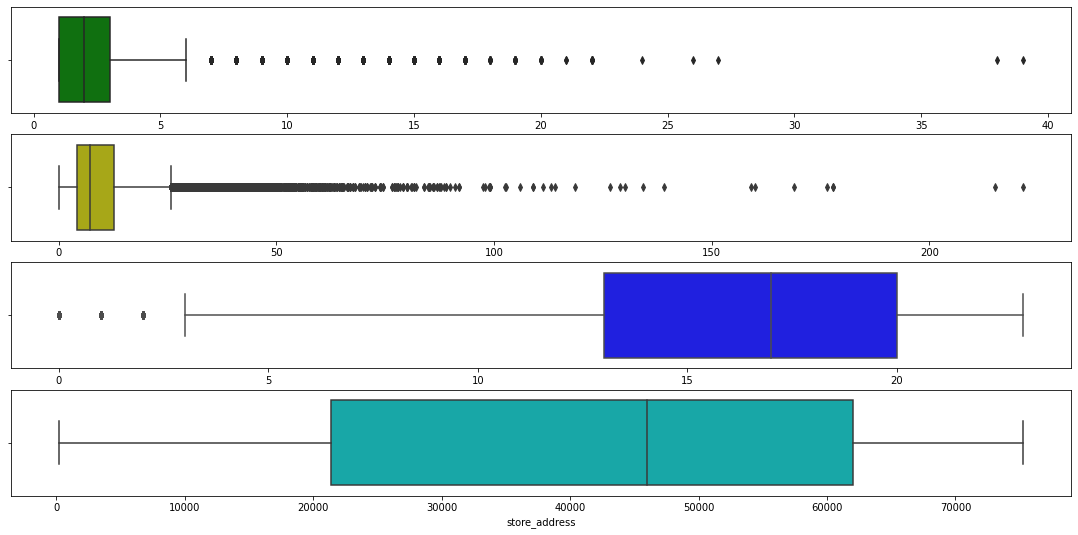

In [ ]:
fig, ax = plt.subplots(4,1,figsize=(19,9))

sns.boxplot(x=df["n_of_products"], ax=ax[0], color='g')

sns.boxplot(x=df["products_total"], ax=ax[1], color='y')

sns.boxplot(x=df["local_time"], ax=ax[2], color='b')

sns.boxplot(x=df["store_address"], ax=ax[3], color='c')

In [ ]:
#Transform some categorical columns to float or binary

def payment(n):
    if n == 'PAID':
        return 1
    elif n == 'NOT_PAID':
        return 0
    else:
        return 0.5
    
df['payment_status'] = df['payment_status'].apply(payment)

def deliver(n):
    if n == 'DeliveredStatus':
        return 1
    else:
        return 0
    
df['final_status'] = df['final_status'].apply(deliver)

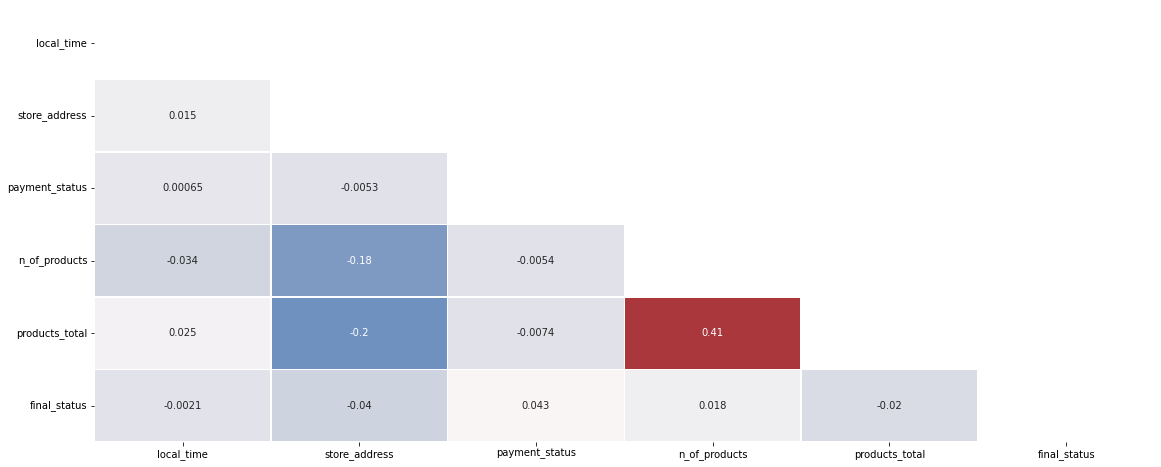

In [ ]:
# check correlation to discard columns if necessary
corr = df.corr()
cmap = sns.light_palette("#0c2a70", as_cmap=True)
mask = np.triu(corr)
plt.figure(figsize=(19,8))
sns.heatmap(corr, cmap='vlag', annot=True, linewidths=0.5, center=0.05, cbar=False, xticklabels=True, mask=mask)

### Process columns

In [ ]:
#cyclical features

# local_time

def sin(xxx):
  yy=np.sin((xxx)*(2.*np.pi/24))
  return yy
df['hour_sin']=df['local_time'].apply(sin)

def cos(xxx):
  yy=np.cos((xxx)*(2.*np.pi/24))
  return yy
df['hour_cos']=df['local_time'].apply(sin)

df.drop(['local_time'], axis=1, inplace=True)

In [ ]:

from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder

scaler = MinMaxScaler(feature_range=(0,1))
df[['store_address']] = scaler.fit_transform(df[['store_address']])

outscaler = MinMaxScaler(feature_range=(0,1))
df[['n_of_products','products_total']] = outscaler.fit_transform(df[['n_of_products','products_total']])

In [ ]:
#Get dummies for countries

one_hot = pd.get_dummies(df['country_code'])
# Drop column B as it is now encoded
df = df.drop('country_code',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [ ]:
df.head()


,store_address,payment_status,n_of_products,products_total,final_status,hour_sin,hour_cos,AR,BR,CI,CL,CR,DO,EC,EG,ES,FR,GE,GT,IT,KE,MA,PA,PE,PR,PT,RO,TR,UA,UY
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
33446280,0.74,1.00,0.03,0.05,1,-0.50,-0.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33107339,0.31,1.00,0.03,0.02,1,0.26,0.26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
32960645,0.83,1.00,0.00,0.03,1,0.26,0.26,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32089564,0.39,1.00,0.13,0.03,1,-0.87,-0.87,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32157739,0.18,1.00,0.00,0.02,0,-0.71,-0.71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(54330, 30)

In [ ]:
#move column to end
column_to_move = df.pop("final_status")
df.insert(len(df.columns), "final_status", column_to_move)

In [ ]:
df['final_status'].value_counts()

1    48498
0     5832
Name: final_status, dtype: int64

### Pre process test database

In [ ]:
dftest=pd.read_csv('/content/drive/MyDrive/akadelivers/test_X.csv', index_col=0, sep=';')
dftest.head()

,local_time,country_code,store_address,payment_status,n_of_products,products_total
order_id,,,,,,
32233784,17:50:09,MA,68169,PAID,1,61.63
32240990,18:38:08,ES,8220,PAID,11,15.99
33331821,22:11:59,IT,11169,PAID,4,5.89
33200505,22:13:55,AR,33371,PAID,3,7.85
32527480,12:01:04,TR,33958,PAID,2,4.75


In [ ]:
# convert local_time hour format
dftest['local_time']=dftest['local_time'].str[:2].astype(int)

#Transform some categorical columns to float 
def payment(n):
    if n == 'PAID':
        return 1
    elif n == 'NOT_PAID':
        return 0
    else:
        return 0.5
    
dftest['payment_status'] = dftest['payment_status'].apply(payment)

# cyclical features
# local_time
dftest['hour_sin']=dftest['local_time'].apply(sin)
dftest['hour_cos']=dftest['local_time'].apply(sin)

dftest.drop(['local_time'], axis=1, inplace=True)

scaler = MinMaxScaler(feature_range=(0,1))
dftest[['store_address']] = scaler.fit_transform(dftest[['store_address']])

outscaler = MinMaxScaler(feature_range=(0,1))
dftest[['n_of_products','products_total']] = outscaler.fit_transform(dftest[['n_of_products','products_total']])

#Get dummies for countries

one_hot1 = pd.get_dummies(dftest['country_code'])
# Drop column B as it is now encoded
dftest = dftest.drop('country_code',axis = 1)
# Join the encoded df
dftest = dftest.join(one_hot1)


In [ ]:
dftest.head()

,store_address,payment_status,n_of_products,products_total,hour_sin,hour_cos,AR,DO,EC,EG,ES,FR,IT,MA,PA,PE,TR,UA
order_id,,,,,,,,,,,,,,,,,,
32233784,0.96,1,0.00,1.00,-0.97,-0.97,0,0,0,0,0,0,0,1,0,0,0,0
32240990,0.07,1,1.00,0.25,-1.00,-1.00,0,0,0,0,1,0,0,0,0,0,0,0
33331821,0.11,1,0.30,0.08,-0.50,-0.50,0,0,0,0,0,0,1,0,0,0,0,0
33200505,0.44,1,0.20,0.12,-0.50,-0.50,1,0,0,0,0,0,0,0,0,0,0,0
32527480,0.45,1,0.10,0.07,0.00,0.00,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
dftest.shape

(30, 18)

In [ ]:
df.head()

,store_address,payment_status,n_of_products,products_total,hour_sin,hour_cos,AR,BR,CI,CL,CR,DO,EC,EG,ES,FR,GE,GT,IT,KE,MA,PA,PE,PR,PT,RO,TR,UA,UY,final_status
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
33446280,0.74,1.00,0.03,0.05,-0.50,-0.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33107339,0.31,1.00,0.03,0.02,0.26,0.26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32960645,0.83,1.00,0.00,0.03,0.26,0.26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32089564,0.39,1.00,0.13,0.03,-0.87,-0.87,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32157739,0.18,1.00,0.00,0.02,-0.71,-0.71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(54330, 29)

### Apply LazyClassifier to find the bes ML model

In [ ]:
import sklearn
from sklearn.utils._testing import ignore_warnings
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import f1_score, precision_score

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
dfsmall = df.sample(frac =.2)

In [ ]:
target_column = ['final_status'] 
predictors = list(set(list(dfsmall.columns))-set(target_column))

In [ ]:
X = dfsmall[predictors].values
y = dfsmall[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print(X_train.shape); print(X_test.shape)

(8692, 29)
(2174, 29)


In [ ]:
#Apply SMOTE to balance oversampling

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [ ]:
(unique, counts) = np.unique(y_sm, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[   0, 7779],
       [   1, 7779]])

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [ ]:
models,predictions = clf.fit(X_sm ,X_test, y_sm, y_test)

100%|██████████| 29/29 [02:08<00:00,  4.44s/it]


In [ ]:
lazies=models.to_dict()

In [ ]:
dflazy=pd.DataFrame.from_dict(lazies)

In [ ]:
dflazy=dflazy.sort_values(by='F1 Score', ascending=False)
dflazy

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
XGBClassifier,0.85,0.53,0.53,0.84,2.30
LGBMClassifier,0.86,0.51,0.51,0.84,0.50
RandomForestClassifier,0.83,0.53,0.53,0.83,2.17
BaggingClassifier,0.82,0.52,0.52,0.82,0.65
ExtraTreesClassifier,0.81,0.53,0.53,0.82,1.77
AdaBoostClassifier,0.80,0.52,0.52,0.81,0.94
DecisionTreeClassifier,0.80,0.53,0.53,0.81,0.14
PassiveAggressiveClassifier,0.78,0.51,0.51,0.80,0.08
ExtraTreeClassifier,0.75,0.55,0.55,0.79,0.06
Perceptron,0.67,0.55,0.55,0.73,0.09


### LGBMClassifier

In [ ]:
import lightgbm as ltb


In [ ]:
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [ ]:
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(X_sm, y_sm, **fit_params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

In [ ]:
opt_parameters = {'colsample_bytree': 0.952164731370897,
                  'min_child_samples': 111,
                  'min_child_weight': 0.01,
                  'num_leaves': 38,
                  'reg_alpha': 0,
                  'reg_lambda': 0.1,
                  'subsample': 0.3029313662262354}

model = ltb.LGBMClassifier(**opt_parameters)
model.fit(X_sm, y_sm)

expected_y  = y_test
predicted_y = model.predict(X_test)

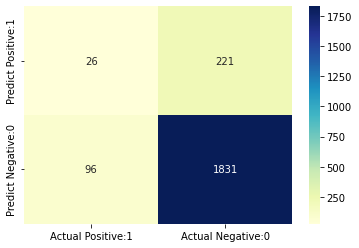

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_y)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print('F1 Score: %.3f' % f1_score(y_test, predicted_y))
print('Precision Score: %.3f' % precision_score(y_test, predicted_y))

F1 Score: 0.920
Precision Score: 0.892


# XGBClassifier

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
xgb_model = xgb.XGBClassifier( random_state=42)
xgb_model.fit(X_sm, y_sm)

y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[  25  222]
 [  91 1836]]


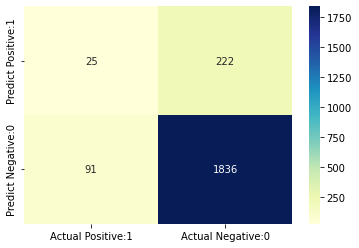

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('Precision Score: %.3f' % precision_score(y_test, y_pred))

F1 Score: 0.921
Precision Score: 0.892


## Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_sm,y_sm)

y_pred=clf.predict(X_test)

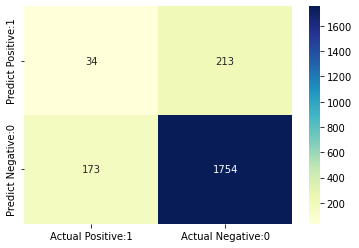

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('Precision Score: %.3f' % precision_score(y_test, y_pred))

F1 Score: 0.902
Precision Score: 0.892


AS we are looking for the highest F1 Score will choose the **XGBClassifier** model. 
If would prefer to mistake a possible cancellation, RandomForestClassifier would probably be a better option because a slighty higher precision

# Prediction

In [ ]:
list1=list(df.columns)

In [ ]:
list2=list(dftest.columns)

In [ ]:
print("Missing values in second list:", (set(list1).difference(list2)))

Missing values in second list: {'CI', 'GT', 'CL', 'BR', 'PR', 'KE', 'CR', 'RO', 'GE', 'final_status', 'PT', 'UY'}


In [ ]:
newcols=['CI', 'GT', 'CL', 'BR', 'PR', 'KE', 'CR', 'RO', 'GE', 'PT', 'UY']

for new in newcols:
  dftest[new] = 0

In [ ]:
# make a prediction
ynew = model.predict(dftest)

predicciones = pd.DataFrame(data=ynew)
predicciones.to_csv('predicciones.csv')

# Extra Installs

In [ ]:
!pip install imbalanced-learn

  Using cached scikit_learn-1.0.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.9 requires scikit-learn==0.23.1, but you have scikit-learn 1.0.1 which is incompatible.


In [ ]:
!pip install lazypredict 

  Using cached lazypredict-0.2.9-py2.py3-none-any.whl (12 kB)
